In [1]:
# MLP for Pima Indians Dataset with 10-fold cross validation
from __future__ import division 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
# from sklearn.cross_validation import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# load pima indians dataset
dataset = numpy.loadtxt("data1.csv", delimiter=",",skiprows=1)
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = scaler.transform(dataset)
# split into input (X) and output (Y) variables

X = dataset[:,1:len(dataset[0])-1]

Y = dataset[:,len(dataset[0])-1]


Using TensorFlow backend.


In [ ]:


# split_ratio = 0.75
# i_split = int(len(dataset) * (1-split_ratio))
# X_train = X[:i_split]
# y_train = Y[:i_split]
# X_test = X[i_split:]
# y_test = Y[i_split:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
# N_EPOCHS = 25
# # # define 10-fold cross validation test harness
# # kfold = StratifiedKFold(n_splits=20, shuffle=True, random_state=seed)
# # cvscores = []
# scores_train = []
# scores_test = []
# epoch = 0
def dnn_model():
	model = Sequential()
	model.add(Dense(100, input_dim=12, activation='relu'))
	model.add(Dense(50, activation='relu'))
	model.add(Dense(25, activation='relu'))
	model.add(Dense(12, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# EPOCH
epoch = 0
model = dnn_model()
history = model.fit(X_train, y_train, validation_data = (X_test,y_test),epochs=15, batch_size=100)
pred = model.predict(X_test)
positive = 0
negative = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(X_test)):
#     print(pred[i])
#     print(y_test[i])
    if y_test[i] == 0:
        negative += 1
    else:
        positive +=1
    if pred[i] >= 0.5 and y_test[i] == 1:
        tp+=1
    elif pred[i] <= 0.5 and y_test[i] == 0:
        tn+=1
    elif pred[i] <= 0.5 and y_test[i] == 1:
        fn+=1
    elif pred[i] >= 0.5 and y_test[i] == 0:
        fp+=1
print(tp/positive)
print(tn/negative)
print(fp/negative)
print(fn/positive)

precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*precision*recall/(precision+recall)


In [ ]:
print(precision)
print(recall)
print(f1)

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(scores_train, color='green', alpha=0.8, label='Train')
# plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
# plt.title("Accuracy over epochs", fontsize=14)
# plt.xlabel('Epochs')
# plt.legend(loc='upper left')
# plt.show()

In [ ]:
# """ Plot """
# fig, ax = plt.subplots(2, sharex=True, sharey=True)
# ax[0].plot(scores_train)
# ax[0].set_title('Train')
# ax[1].plot(scores_test)
# ax[1].set_title('Test')
# fig.suptitle("Accuracy over epochs", fontsize=14)
# plt.show()

In [47]:
import keras
from keras.layers import GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation, Embedding
import numpy as np
from keras.utils import to_categorical
split_ratio = 0.25
i_split = int(len(dataset) * (1-split_ratio))
X_train = X[:i_split,:]
y_train = Y[:i_split]
X_test = X[i_split:,:]
y_test = Y[i_split:]
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

y_train = to_categorical(y_train, 12)
y_test = to_categorical(y_test, 12)


y_test = np.reshape(y_test, (y_test.shape[0],y_test.shape[1],1))
y_train =  np.reshape(y_train, (y_train.shape[0],y_test.shape[1],1))

# X_train = X_train.reshape(i_split,1, 12)
# y_train = y_train.reshape( i_split,1, 1)
# X_test = X_test.reshape(len(dataset) - i_split,1, 12)
# y_test = y_test.reshape(len(dataset) - i_split, 1, 1)
# 
def gru_model():
    model = Sequential()
    model.add(GRU(units=50, activation=('tanh'), recurrent_dropout=0.5,input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True))
    model.add(GRU(50,  activation=('relu'), return_sequences = True, recurrent_dropout=0.2, stateful = False))
    model.add(Dense(output_dim=1))
    model.add(Activation('sigmoid'))
    model.compile(loss=keras.losses.mean_squared_error, optimizer='rmsprop', metrics = ['accuracy'])
    model.summary()
    return model
    
model = gru_model()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
history = model.fit(X_train, y_train, batch_size = 1000, epochs = 15, validation_data=(X_test, y_test))
pred = model.predict(X_test)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:35: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_24 (GRU)                 (None, 12, 50)            7800      
_________________________________________________________________
gru_25 (GRU)                 (None, 12, 50)            15150     
_________________________________________________________________
dense_13 (Dense)             (None, 12, 1)             51        
_________________________________________________________________
activation_13 (Activation)   (None, 12, 1)             0         
Total params: 23,001
Trainable params: 23,001
Non-trainable params: 0
_________________________________________________________________
(36268, 12, 1)
(12090, 12, 1)
(36268, 12, 1)
(12090, 12, 1)
Train on 36268 samples, validate on 12090 samples
Epoch 1/15
36268/36268 [==============================] - 7s 180us/step - loss: 0.0981 - acc: 0.8940 - val_loss: 0.0579 - val_acc: 0.9167
Epoch 2/15
36268/36268

In [48]:
print(pred.shape)
print(y_test.shape)
pred = pred.reshape(pred.shape[0]*pred.shape[1], 1)
y_test = y_test.reshape(pred.shape[0]*pred.shape[1], 1)
print(pred)

(12090, 12, 1)
(12090, 12, 1)
[[0.00432205]
 [0.9995575 ]
 [0.        ]
 ...
 [0.        ]
 [0.        ]
 [0.        ]]


In [49]:
positive = 0
negative = 0
tp = 0
tn = 0
fp = 0
fn = 0
for i in range(len(pred)):
#     print(pred[i])
#     print(y_test[i])
    if y_test[i] == 0:
        negative += 1
    else:
        positive +=1
    if pred[i] >= 0.5 and y_test[i] == 1:
        tp+=1
    elif pred[i] <= 0.5 and y_test[i] == 0:
        tn+=1
    elif pred[i] <= 0.5 and y_test[i] == 1:
        fn+=1
    elif pred[i] >= 0.5 and y_test[i] == 0:
        fp+=1
print(tp/positive)
print(tn/negative)
print(fp/negative)
print(fn/positive)

0.998014888337469
0.9998270546657644
0.00017294533423565682
0.0019851116625310174


In [50]:
precision = tp/(tp+fp)
recall = tp/(tp+fn)
f1 = 2*precision*recall/(precision+recall)
print(precision)
print(recall)
print(f1)

0.9980974439573166
0.998014888337469
0.9980561644402167


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


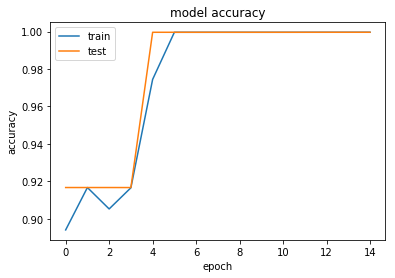

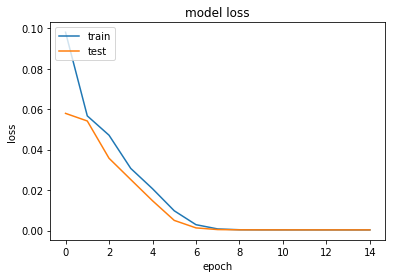

In [51]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
